<a href="https://colab.research.google.com/github/JDS289/DNNs/blob/main/finalA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks - First Assignment 2025
## A: *Reparametrization*: the effect of parameter scaling

#Linear Models Under Reparametrization:

Mounted at /content/drive


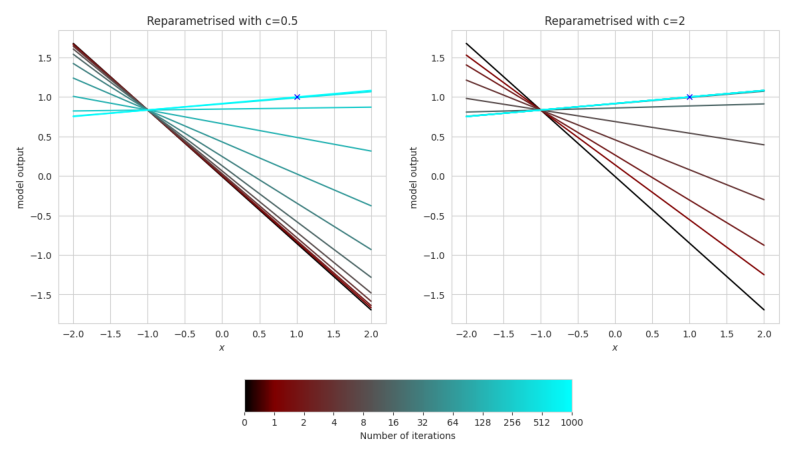

In [5]:
import cv2; from matplotlib import pyplot as plt; from google.colab import drive; drive.mount("/content/drive");
plt.figure(figsize = (10, 6)); plt.imshow(cv2.imread("drive/MyDrive/DNNs1/linearGraphs.png")[:,:,::-1]); plt.axis("off");


The parameters of the $~c=2~$ model learn faster (as shown below), so it converges faster here (specifically, $(\frac{2}{0.5})^2 = 16$ times faster).
Also notice that all the lines seem to go through the same $(-1, y_1)$ point.This is because $~y_1 = -w+b$, and as demonstrated below, $w$ and $b$ always receive equal updates, so $y_1$ stays constant.

##Derivation

$$
\text{Let } o(x) \text{ refer to the “original" (un-reparametrized) model,}
\\ \text{and }     r(x) \text{ to a model reparametrized with } c \text{.}~~~~~~~~~~~~~~~~~~~~~~~~~~~
\\ o(x) = w_o x+b_o, ~~~~ r(x) = cw_r x + cb_r
\\ \text{(initially } w_r = w_o/c ~ \text{ and } ~ b_r=b_o/c \text{)}
\\[0.3in]
\\ \Delta w_o ∝ \frac{\partial L(o)}{\partial w_o} = \frac{\partial (w_o+b_o-1)^2}{\partial w_o} = \frac{\partial (w_o^2+2w_o(b_o-1) + (b_o -1)^2)}{\partial w_o} = 2w_o + 2b_o -2
\\ \Delta b_o ∝ \frac{\partial L(o)}{\partial b_o} = \frac{\partial (w_o+b_o-1)^2}{\partial b_o} = \frac{\partial (b_o^2 + 2b_o(w_o-1) + (w_o-1)^2)}{\partial b_o} = 2w_o +2b_o -2
\\[0.2in]
\\
\Delta w_r ∝ \frac{\partial L(r)}{\partial w_r} = \frac{\partial (cw_r+cb_r-1)^2}{\partial w_r} = 2c^2w_r + 2c(cb_r-1) = c(2cw_r+2cb_r-2) = c(2w_o + 2b_o -2)
\\
\Delta b_r ∝ \frac{\partial L(r)}{\partial b_r} = \frac{\partial (cw_r+cb_r-1)^2}{\partial b_r} = 2c^2b_r + 2c(cw_r-1) = c(2cb_r+2cw_r-2) = c(2w_o + 2b_o -2)
\\[0.2in]
\text{So } \Delta w_o = \Delta b_o = \frac{\Delta w_r}{c} = \frac{\Delta b_r}{c}
$$

Thus the parameters in the reparametrised model are updated at *c* times the rate. But remember, $o(x) = w_o x+b_o ~$ and $~ r(x) = cw_r x + cb_r$, so in effect the reparametrised model learns at $c^2$ times the original rate.

#RELU Models Under Reparametrization

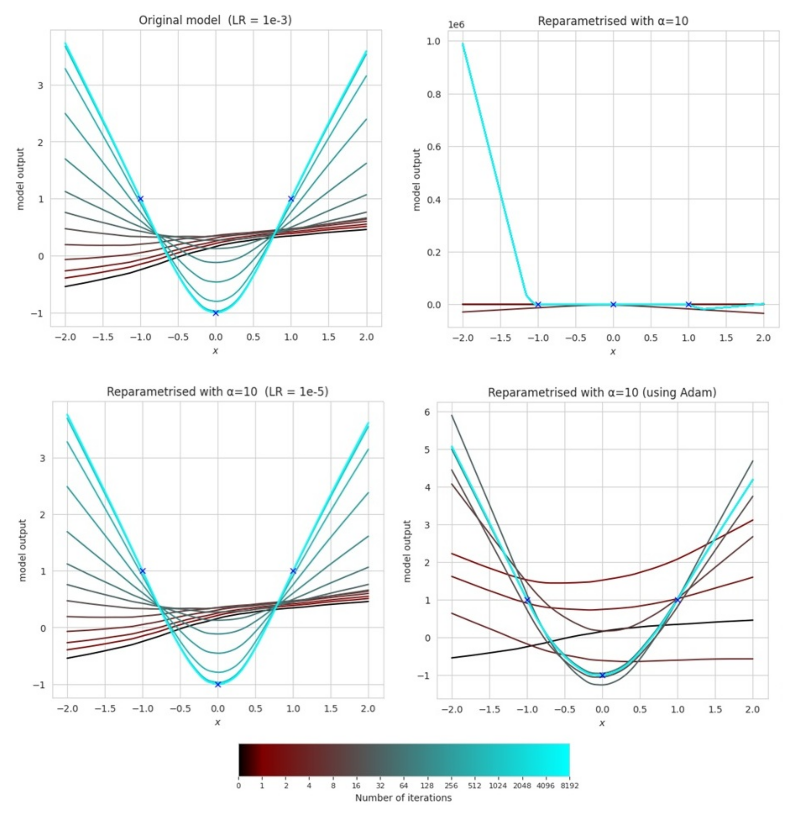

In [4]:
plt.figure(figsize = (10, 15)); plt.imshow(cv2.imread("drive/MyDrive/DNNs1/graphs.jpg")[:,:,::-1]); plt.axis("off");

When I reparametrise the RELU with α=10 (keeping Learning Rate at 10^-3) as shown in top-right, it reaches an extreme solution (nearly reaching 1e6), but it does seem to be "converged"/stable. This suggests its (in-effect) learning rate is too high and it has shot past the good solution (top-left) and instead found some worse local optimum (the loss, when checked, is about $10^{11}$ times higher). While experimenting with lower learning rates, I noticed that dividing the learning rate by 100 (bottom-left) seems to give identical results to the top-left -- this suggests the learning-rate-in-effect was boosted by α^2; this would be the same as the effect on the linear model! Switching to Adam instead does pretty well (instead of SGD) -- the behaviour isn't identical, but it seems to converge to a similar solution at a similar rate.